<a href="https://colab.research.google.com/github/caxaxa/Chacha_PhD_Projects/blob/master/Incentive_Curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def get_ICs(n, alphas):
    x = np.arange(0, 1,1/n )

    #Ploting Indiference curves

    fig, ax = plt.subplots(figsize = (5,4))

    ax.plot(x, alphas, linewidth=2)

    fig.add_subplot(ax)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    fig.text(0.92, 0.05, '$𝛽$')
    fig.text(0.11, 0.9, '$𝛼$')

    ax.fill_between(x, alphas, facecolor='salmon', alpha=0.1)

    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.grid(False)
    plt.xticks(np.arange(0,1.1,1))
    plt.yticks(np.arange(0,1.1,1))
    #plt.title('Indiference curves')
    plt.legend(('Incentive Constraint','Corruption Zone' ),loc='best', shadow=False)
    #plt.grid(True)
    # fig.text(0.18, 0.2, 'Corruption')
    # fig.text(0.5, 0.4, 'No Corruption')
    plt.savefig('./fig1.pdf')
    plt.show()

In [129]:
def get_b_star(gamma,alpha,beta,c,a,f):
  return (((gamma**2)*((1-alpha*beta)*a-alpha*beta*f)) + ((gamma**2*alpha*beta*f+c)/((gamma**2)*(1-alpha*beta))))/2

def get_y_payer(gamma,alpha,beta,f,b):
  return -b +(gamma**2)*((1-alpha*beta)*a - alpha*beta*f)

def get_y_receiver(gamma,alpha,beta,f,b,c):
  return -c +(gamma**2)*((1-alpha*beta)*b - alpha*beta*f)

#Creat the function in py: only for creating the inicial variable:


def u(c,eta):
    if eta == 1:
      return np.log(c)
    elif eta > 0 :
      return (((c**(1-eta))-1)/(1-eta))+1
    else:
      return -(((c**(1-eta))-1)/(1-eta))-1
        


## Icentive Constraint Function

def alpha_solver(n,gamma,alpha,beta,a,c,f):
  alphas = np.zeros(n)
  for i in range(0,n,1):
    beta = i/n 
    alpha = 0
    while get_y_payer(gamma,alpha,beta,u(f,eta),u(get_b_star(gamma,alpha,beta,c,a,f),eta)) > 0:
      alpha += 1/n
      if alpha>1.01:
        break
    alphas[i] = alpha -1/n
  return alphas

## R_payer Function

def R_payer_solver(n,gamma,alpha,beta,a,c,f,R):
  R_p = np.zeros(n)
  for i in range(0,n,1):
    beta = i/n 
    alpha = 0
    while (gamma**2)*((1-alpha*beta)*u(get_b_star(gamma,alpha,beta,c,a,f),eta) - alpha*beta*u(f,eta)) > - u(R*f,eta):
      alpha += 1/n
      if alpha > 1.01:
        break
    R_p[i] = alpha - 1/n
  return R_p

## P_payer Function

def P_payer_solver(n,gamma,alpha,beta,a,c,f,P):
  P_p = np.zeros(n)
  for i in range(0,n,1):
    beta = i/n 
    alpha = 0
    while (gamma*((1-beta)*u(get_b_star(gamma,alpha,beta,c,a,f),eta) - beta*u(f,eta)) > -u(P*f,eta)):
      alpha += 1/n
      if alpha>1.01:
        break
    P_p[i] = alpha -1/n
  return P_p


def R_receiver_solver(n,gamma,alpha,beta,a,c,f,R):
  R_r = np.zeros(n)
  for i in range(0,n,1):
    beta = i/n 
    alpha = 0
    while (gamma**2)*((1-alpha*beta)*u(a,eta) - alpha*beta*u(f,eta)) > -u (R*f,eta):
      alpha += 1/n
      if alpha > 1.01:
        break
    R_r[i] = alpha - 1/n
  return R_r

## P_payer Function

def P_receiver_solver(n,gamma,alpha,beta,a,c,f,P):
  P_r = np.zeros(n)
  for i in range(0,n,1):
    beta = i/n 
    alpha = 0
    while (gamma*((1-beta)*u(a,eta) - beta*u(f,eta)) > -u(P*f,eta)):
      alpha += 1/n
      if alpha>1.01:
        break
    P_r[i] = alpha -1/n
  return P_r


# Setting Inicial State

j = 500
gamma = 0.9
alpha = 0.4
beta = 0.3
a = 10
c = 1
f = 20
eta = 0
R = -.1
r = 0.5
P = .6
p = .9
n = 500


In [130]:
def get_IC_star(n,R_star,P_star,show_arrow = False):
    x = np.arange(0.0000001, 1,1/n )
    N = 0.5


    alphas = alpha_solver(n,gamma,alpha,beta,a,c,f)

    #Ploting Indiference curves

    P_p = P_payer_solver(n,gamma,alpha,beta,a,c,f,P_star)
    R_p = R_payer_solver(n,gamma,alpha,beta,a,c,f,R_star)

    R_r = R_receiver_solver(n,gamma,alpha,beta,a,c,f,R_star)

    P_r = P_receiver_solver(n,gamma,alpha,beta,a,c,f,P_star)
    

    fig, ax = plt.subplots(figsize = (7,4))

    ax.plot(x, alphas, linewidth=2)
    ax.plot(x,R_p,'-.',linewidth=.5 )
    ax.plot(x,R_r,linewidth=.5 )
    ax.plot(x,P_p,'--',color='blue',linewidth=.5 )
    ax.plot(x,P_r, color= 'green', linewidth = .8)

    # ax.plot(P, x ,linewidth=.5 )

    fig.add_subplot(ax)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    fig.text(0.58, 0.05, '$𝛽$')
    fig.text(0.025, 0.9, '$𝛼$')
    #fig.text(0.65, 0.08, '$𝛽~(P*) $')
    #fig.text(0.02, 0.485, '$𝛼~(R*)$')

    
    lim = int(625) 

    ax.fill_between(x[0:lim], alphas[0:lim], facecolor='salmon', alpha=0.1)
    ax.fill_between(x, alphas , R_p ,facecolor='white', alpha=1,label='_nolegend_')
    ax.fill_between(x, alphas, R_p, facecolor='yellow', alpha=0.1)
    #ax.fill_between(P_p, x, facecolor='yellow', alpha=0.1)
    ax.fill_between(x[lim: n], R_p[lim : n], facecolor='green', alpha=0.1)

    if show_arrow == True:
      ax.arrow(0.6, 0.17,- 0.05,- 0.05, head_width=0.02, head_length=0.02 )
      ax.arrow(0.6, 0.17, 0.05, 0.05, head_width=0.02, head_length=0.02 ,color =  'green',alpha = 0.5)
      ax.arrow(0.415, 0.415, -0.05,  -0.05, head_width=0.02, head_length=0.02 )
      ax.arrow(0.405, 0.435, -0.05, -0.05, head_width=0.02, head_length=0.02 ,color =  'green',alpha = 0.5)
      ax.arrow(0.415, 0.695,- 0.05,- 0.05, head_width=0.02, head_length=0.02 )
      ax.arrow(0.405, 0.715, -0.05, -0.05, head_width=0.02, head_length=0.02 ,color =  'green',alpha = 0.5)
      ax.arrow(0.7, 0.1,- 0.05,0, head_width=0.02, head_length=0.02 )
      ax.arrow(0.7, 0.1, 0.05, 0, head_width=0.02, head_length=0.02 ,color =  'green',alpha = 0.5)
      ax.arrow(0.415, 0.695,- 0.05,- 0.05, head_width=0.02, head_length=0.02 )
      ax.arrow(0.405, 0.715, -0.05, -0.05, head_width=0.02, head_length=0.02 ,color =  'green',alpha = 0.5)
      ax.arrow(0.78, 0.92, -0.05,  0, head_width=0.02, head_length=0.02 )
      ax.arrow(0.78, 0.95, -0.05,  0, head_width=0.02, head_length=0.02 ,color =  'green',alpha = 0.5)


    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.grid(False)
    plt.xticks(np.arange(0,1.1,1))
    plt.yticks(np.arange(0,1.1,1))
    #plt.title('Indiference curves')
    plt.legend(('Incentive Constraint','$R_{payer}^*$','$R_{receiver}^*$','$P_{payer}^*$','$P_{receiver}^*$','Self-Reporting','Plea Bragaining'),bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    if show_arrow == True:
      plt.savefig('./fig3.pdf')
    else:
      plt.savefig('./fig2.pdf')
    plt.show()

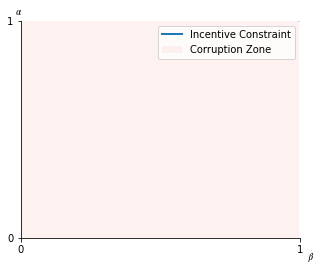

In [139]:
alphas = alpha_solver(n,gamma,alpha,beta,a,c,f)
get_ICs(n,alphas)

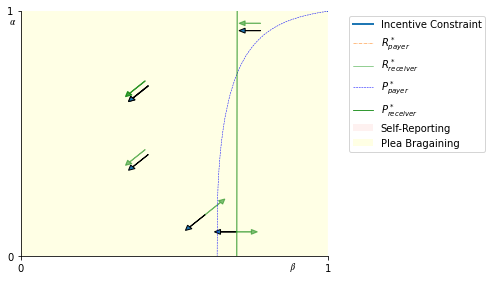

In [140]:
get_IC_star(1000,-.1,.5,show_arrow=True)

In [141]:
u(10,.5)

5.324555320336759

In [142]:
# Plotting the Isoelastic Utility Function

c_domain = np.arange(-50,50,1)

In [143]:
c_domain

array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
       -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
       -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49])

In [144]:
u_c = np.zeros(len(c_domain))
c_domain = c_domain.tolist()
for i in range(len(c_domain)):
  u_c[i] = np.real(u(c_domain[i],0.8))
  

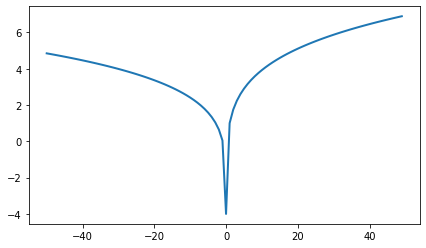

In [145]:
fig, ax = plt.subplots(figsize = (7,4))

ax.plot(c_domain, u_c , linewidth=2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in power
  


nan